### Intalling libs

In [1]:
#  pip install pydotplus
# !pip install graphviz
# !pip install IPython
# !pip install dtreeviz
# !pip install -q dtreeviz
# !pip install xgbfir
# !pip install openpyxl
# openpyxl.__version__
# !pip list
# !pip install LightGBM
# !pip install 'dask>2023.3.2'
# !pip install 'distributed>2023.3.2'

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Importing Libs

In [2]:
# data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)
import janitor as jn

from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    ensemble,
    preprocessing,
    tree,
    impute,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    plot_tree
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

import rfpimp

import lightgbm as lgb

import xgboost as xgb

import xgbfir

# data model metrics
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

from yellowbrick.model_selection import (
    LearningCurve
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/rfpimp.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/rfpimp.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-exp

### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Deleting _Class_ feature at the end
We are deleting because is the same as _pclass_ (same result, same data)

In [4]:
df = df.drop('Class', axis = 'columns')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Converting DataFrame Column Names to Lowercase snakecase

In [5]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df

,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Preparing the dataset

In [6]:
# dropping columns taht do not add value
df = df.drop(columns = ['name',
                        'name_wiki',
                        'wiki_id',
                        'hometown',
                        'destination',
                        'ticket',
                        'lifeboat',
                        'body',
                        'cabin',
                        'fare',
                        'age_wiki',
                        'age'])

# using get_dummies function to convert object to int
df = pd.get_dummies(df)

# dropping redundant features
df = df.drop(columns = ['sex_male'])

#remove rows with any values that are not finite (NaN or infite)
df = df[np.isfinite(df).all(1)]

# first, we need to create a series of the target feature
df = df.apply(lambda column: column.astype(int))
y = df.survived

# then, we create a DataFrame with the attributes
df = df.replace({True: 1, False: 0})
X = df.drop(columns = ['survived'])

# using the scikit-learn to split 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
X.isnull().sum()

pclass                 0
sib_sp                 0
parch                  0
sex_female             0
embarked_C             0
embarked_Q             0
embarked_S             0
boarded_Belfast        0
boarded_Cherbourg      0
boarded_Queenstown     0
boarded_Southampton    0
dtype: int64

In [8]:
X.dtypes

pclass                 int64
sib_sp                 int64
parch                  int64
sex_female             int64
embarked_C             int64
embarked_Q             int64
embarked_S             int64
boarded_Belfast        int64
boarded_Cherbourg      int64
boarded_Queenstown     int64
boarded_Southampton    int64
dtype: object

In [9]:
y_train.isnull().sum()

0

In [10]:
y.dtypes

dtype('int64')

### Classification
Classification is a _supervised learning_ method for assigning a label to a sample based on attributes. _Supervised learning_ implies that we have labels for classification or numbers for regression, which the algorithm must learn.<br><br>
In __sklearn__, we will create a model instance and call the _.fit()_ method with the training data and labels. We can then call the _.predict_ method (or the _.predict_proba_ or _.predict_log_proba_ methods) with the model after the adjustments. Finally, to evaluate the model, we can use the _.score()_ method.<br><br>
In general, the biggest challenge is organizing the data to use the __sklearn models__. The data (X) must be in a numpy array (m by n) format or in the pandas DataFrame format. The target data (y) is in a pandas vector or series.
For information, there are several metrics to evaluate how well the model performs on new data.<br><br>
The generic methods that __sklearn models__ implement are:<br>

_fit(X, y[, sample_weight])_
- Adjusts a model

_predict(X)_
- Predict classes

_predict_log_proba(X)_
- Predicts the probability lizarithm

_predict_proba(X)_
- Makes probability prediction

_weight(X, y[, sample_weight])_
- Get accuracy

### Logistic Regression
Logistic Regression estimates probabilities using a logistic function (used for classification).

Efficiency in execution
- You can use *n_jobs* if you are not using the _liblinear_ solver

Interpretation of Results
- The *.coef_* attribute of the model after fitting shows the coefficients of the decision function. A change of x by one unit modifies the log odds ratio according to the coefficient. The *.intercept_* attribute is the inverse of the log odds of the base condition.

In [11]:
# applying the model
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

LogisticRegression(random_state=42)

In [12]:
# testing the model performance
lr.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7873134328358209

In [13]:
lr.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([0])

In [14]:
lr.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.90740569, 0.09259431]])

In [15]:
lr.predict_log_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[-0.09716564, -2.3795276 ]])

In [16]:
lr.decision_function(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([-2.28236197])

#### Attributes after fitting
*coef_*
- Decision function coefficients

*intercept_*
- Intercept of the decision function

*m_iter_*
- Number of iterations

#### The intercept is the log odds of the base condition. We can convert it back to a percentage accuracy (probability)

In [17]:
lr.intercept_

array([0.44906503])

In [18]:
# creating the logit inverse function
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [19]:
inv_logit(lr.intercept_)

array([0.61041691])

#### You can inspect the coefficients. The inverse ligit of the coefficients gives us the proportion of positive cases. In other words, for each of the attributes, we can increase or reduce the chance of survival (in the case of the Titanic).

In [20]:
# defining de the columns to be analysed
cols = X.columns

for col, val in sorted(
    zip(cols, lr.coef_[0]),
    key = lambda x: x[1],
    reverse = True,
):
    print(
        f"{col:10}{val:10.3f} {inv_logit(val):10.3f}"
    )

sex_female     2.487      0.923
boarded_Cherbourg     0.334      0.583
boarded_Queenstown     0.311      0.577
embarked_C     0.247      0.561
boarded_Southampton     0.168      0.542
parch         -0.035      0.491
embarked_Q    -0.043      0.489
sib_sp        -0.183      0.454
embarked_S    -0.295      0.427
pclass        -0.807      0.308
boarded_Belfast    -0.829      0.304


#### We can use yellowbrick lib to visualize

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.


FeatureImportances(ax=<AxesSubplot:>,
                   estimator=LogisticRegression(random_state=42))

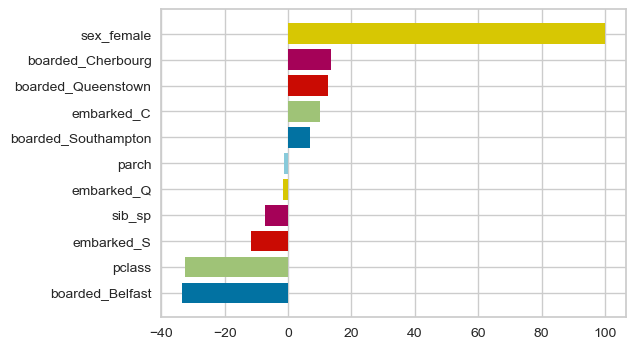

In [21]:
fig, ax = plt.subplots(figsize = (6, 4))

fi_viz = FeatureImportances(lr)

fi_viz.fit(X, y)

### Naive Bayes
Naive Bayes is a probabilistic classifier that assumes independence between data attributes. It is popular for text classification applications, such as *spam* identification.<br><br>
An advantage of this model is that, by assuming independence between attributes, it is capable of training a model with a small number of samples. A disadvantage is that the model will not be able to capture interactions between attributes.<br><br>
__GaussianNB__
- Assumes a normal distribution

__MultinomialNB__
- Used for discrete occurrence counters

__BernoulliNB__
- Used for discrete Boolean attributes

__Model properties__

_Pre processing_
- it is assumed that the data are independent. Performance should be better if we remove collinear columns. For continuous numeric data, it may be better to separate into bins.

_To avoid overfitting_
- exhibits high bias and low variance (ensembles will not reduce variance).

_Interpretation of results_
- percentage is the probability of a sample belonging to a class based on priors (prior knowledge)

In [22]:
nb = GaussianNB()

nb.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

GaussianNB()

In [23]:
nb.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.4253731343283582

In [24]:
nb.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([1])

In [25]:
nb.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.00891204, 0.99108796]])

In [26]:
nb.predict_log_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[-4.7203523 , -0.00895199]])

__Instance Parameters__

_priors_
- prior probabilities (prior) of classes

_var_smoothing = 1e-9_
- Adding to variance for stable calculations

<br><br>
__Attributes after adaptation__

_class_prior_
- Class probabilities

_class_count_
- Class counters

_theta_
- Average and each column per class

_sigma_
- Variance of each column by class

_epsilon_
- Value to be added for each variance

### Support Vector Machine (SVM)
An SVM is an algorithm that tries to adapt a line between different classes in order to maximize the distance from the line to the class points.<br><br>
__Model properties__<br>
_Efficiency in execution_
- The scikit-learn implementation is O(n4), so it may be difficult to scale to larger sizes. Using a linear kernel or the _LinearSVC_ model can improve execution performance, perhaps at the expense of accuracy.

_Data pre-processing_
- The algorithm is not scale invariant. Standardizing data is highly recommended.

_To avoid overfitting_
- Parameter C (penalty parameter) controls regularization. A smaller value allows for a smaller margin in the hyperplane. A larger value for _gamma_ will tend to overfit the training data.

_Interpretation of results_
- We should inspect .support_vectors_, although they can be difficult to explain. With linear kernels you will be able to inspect the .coef_

In [27]:
svc = SVC(random_state = 42, probability = True)

svc.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

SVC(probability=True, random_state=42)

In [28]:
svc.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.8134328358208955

In [29]:
svc.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([0])

In [30]:
svc.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.86433962, 0.13566038]])

In [31]:
svc.predict_log_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[-0.14578951, -1.99760072]])

We use _probability_ = True to obtain the probabilities.

__Instance Parameters__

_C=1.0_
- penalty parameter. The lower the value, the narrower the decision boundary (more overfit).

*cache_size*
- Cache size (MB). Increasing this value can improve training time on large data sets.

*class_weight*
- Dictionary or _balanced_

*coef*
- Independent term for polynomial and sigmoid kernels

*degree*
- Degree for polynomial kernel

*max_iter*
- maximum number of iterations for the solver. -1 indicates there are no limits

*probability*
- False activates probability estimation. Makes training slower

*tol*
- Stop tolerance

*support_*
- Support vector indices

*support_vectors_*
- Support vectors

*n_support_vectors_*
- Number of support vectors per class

*coef_*
- Coefficients for kernel

### K vizinhos mais próximos (KNN)
The KNN (K-Nearest Neighbor) algorithm performs the classification based on the distance to some training samples (k). The family of algorithms is called _instance-based learning_, as there are no parameters to learn. The model assumes that the distance is sufficient to make the inference.<br><br>
The tricky part is selecting the appropriate value of _K_. Furthermore, the curse of dimensionality can hinder distance metrics, as there will be little difference between the closest and most distant neighbors in the case of more dimensions.<br><br>
__Model properties__<br>
_Data pre-processing_
- Distance-based calculations perform better if there is standardization

_To avoid overfitting_
- Elevate *n_neighbors*. Change *p* to L1 or L2 metric

*Interpretation of results*
- Interprets the k nearest neighbors for the sample (using the .kneighbors method)

In [32]:
knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

KNeighborsClassifier()

In [33]:
knc.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7611940298507462

In [34]:
knc.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([0])

In [35]:
knc.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.8, 0.2]])

__Attributes__<br>
*leaf size*
- Used for tree-based algorithms

*metric*
- Distance metric

*metric_params*
- Additional parameter dictionary for custom metrics function

*n_jobs*
- Number of CPUs

*n_neighbors*
- Number of neighbors

*weights*
- Because it gives *distance*, in which case closer points will have more influence

### Decision Tree
We can use a question and answer process to predict a target class. The advantages of this model include support for non-numeric features, little need for data preparation, support for dealing with non-linear relationships, and finally, we can obtain the importance of the attributes at the end of the model.<br><br>
__Model properties__<br>
*Efficiency in execution*
- goes through each of the attributes and sorts all *n* samples;

*Data pre-processing*
- it is not necessary to climb. You need to get rid of missing values ​​and convert them into numerical data;

*To avoid overfitting*
- set *max_depth* to a smaller number and increase *min_impurity_decrease*

*Interpretation of results*
- because there are steps, a tree is bad at dealing with linear relationships. The tree is also extremely dependent on training data.

In [36]:
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)

In [37]:
dt.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
dt.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7985074626865671

In [39]:
dt.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([0])

In [40]:
dt.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.87364621, 0.12635379]])

In [41]:
dt.predict_log_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[-0.13507978, -2.06866944]])

__Attributes__<br>
*class_weight*
- class weights in a dictionary. *balanced* defines values in inverse proportion to class frequencies

*criterion='gini'*
- separation function, *gini* or *entropy*

*max_depth=None*
- depth of the tree

*max_features=None*
- number of attributes to be analyzed for separation. The default value is all

*max_leaf_nodes=None*
- limitates the number of leaves

*min_impurity_decrease=0.0*
- separates a node if the separation decreases the impurity by an amount greater than or equal to the defined

*min_samples_leaf*
- minimum number of samples required to separate a node<br><br>


**Attributes after adjustment**

*classes_*
- class label

*feature_importances_*
- array with the importance of each feature

*n_classes_*
- number of classes

*n_features_*
- number of attributes

#### Viewing the implemented tree

In [42]:
'''
dot_data = StringIO()

tree.export_graphviz(
    dt,
    out_file=dot_data'
    feature_names=["Died", "Survived"],
    filled=True
)

g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
'''

'\ndot_data = StringIO()\n\ntree.export_graphviz(\n    dt,\n    out_file=dot_data\'\n    feature_names=["Died", "Survived"],\n    filled=True\n)\n\ng = pydotplus.graph_from_dot_data(\n    dot_data.getvalue()\n)\n'

In [43]:
'''
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True'
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

g.write("py-projectsdata-science-projectsmachine-learning-pocket-reference-tree_classifier_view.png")
'''

'\nimport pydotplus\nfrom io import StringIO\nfrom sklearn.tree import export_graphviz\ndot_data = StringIO()\ntree.export_graphviz(\n    dt,\n    out_file=dot_data,\n    feature_names=X.columns,\n    class_names=["Died", "Survived"],\n    filled=True\'\n)\ng = pydotplus.graph_from_dot_data(\n    dot_data.getvalue()\n)\n\ng.write("py-projectsdata-science-projectsmachine-learning-pocket-reference-tree_classifier_view.png")\n'

In [44]:
# Image(g.create_png())

#### Visualizing DecisionTree, which provides valuable visual insights

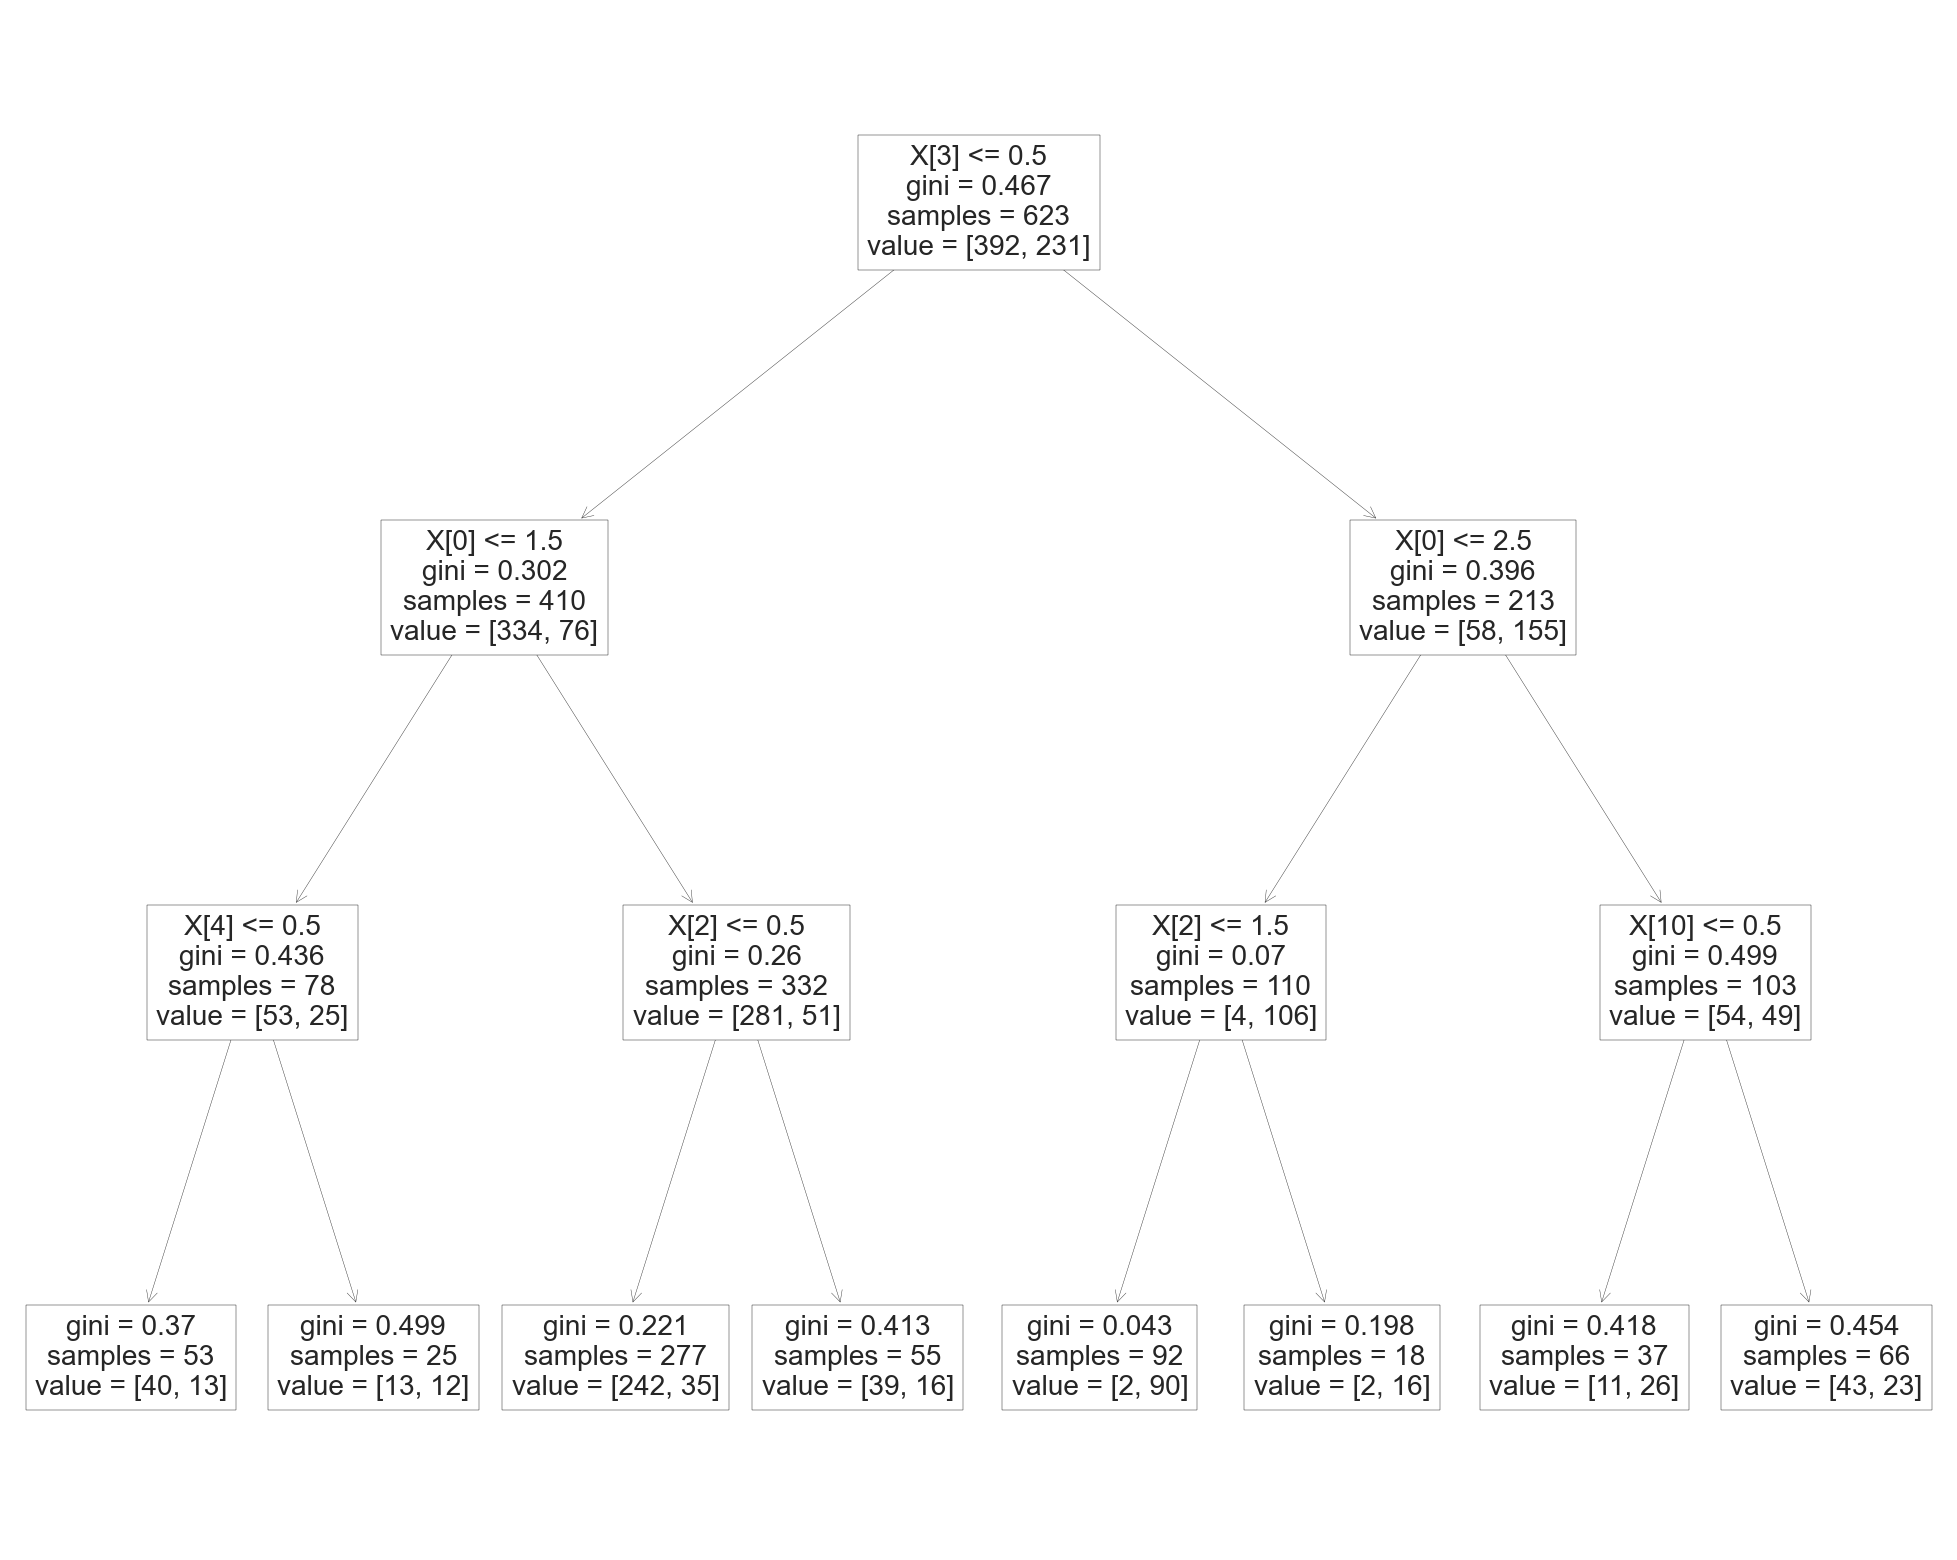

In [45]:
# using tree.plot_tree to visualize DecisionTreeClassifier
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt
                  )

[Text(0.5, 0.875, 'X[3] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.25, 0.625, 'X[0] <= 1.5\ngini = 0.302\nsamples = 410\nvalue = [334, 76]'),
 Text(0.125, 0.375, 'X[4] <= 0.5\ngini = 0.436\nsamples = 78\nvalue = [53, 25]'),
 Text(0.0625, 0.125, 'gini = 0.37\nsamples = 53\nvalue = [40, 13]'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.375, 0.375, 'X[2] <= 0.5\ngini = 0.26\nsamples = 332\nvalue = [281, 51]'),
 Text(0.3125, 0.125, 'gini = 0.221\nsamples = 277\nvalue = [242, 35]'),
 Text(0.4375, 0.125, 'gini = 0.413\nsamples = 55\nvalue = [39, 16]'),
 Text(0.75, 0.625, 'X[0] <= 2.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.625, 0.375, 'X[2] <= 1.5\ngini = 0.07\nsamples = 110\nvalue = [4, 106]'),
 Text(0.5625, 0.125, 'gini = 0.043\nsamples = 92\nvalue = [2, 90]'),
 Text(0.6875, 0.125, 'gini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.875, 0.375, 'X[10] <= 0.5\ngini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 

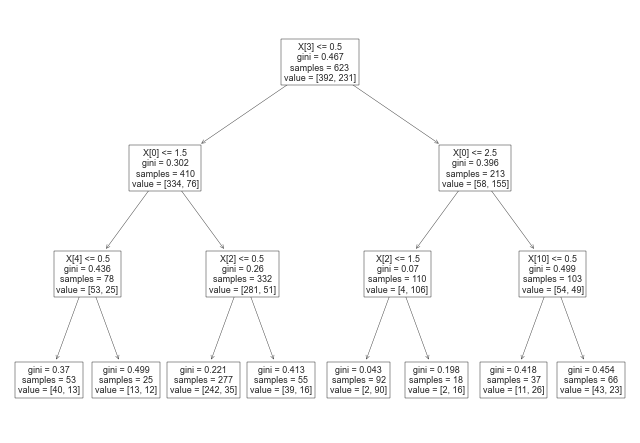

In [46]:
# using plot_tree to view DecisionTreeClassifier
plot_tree(dt)

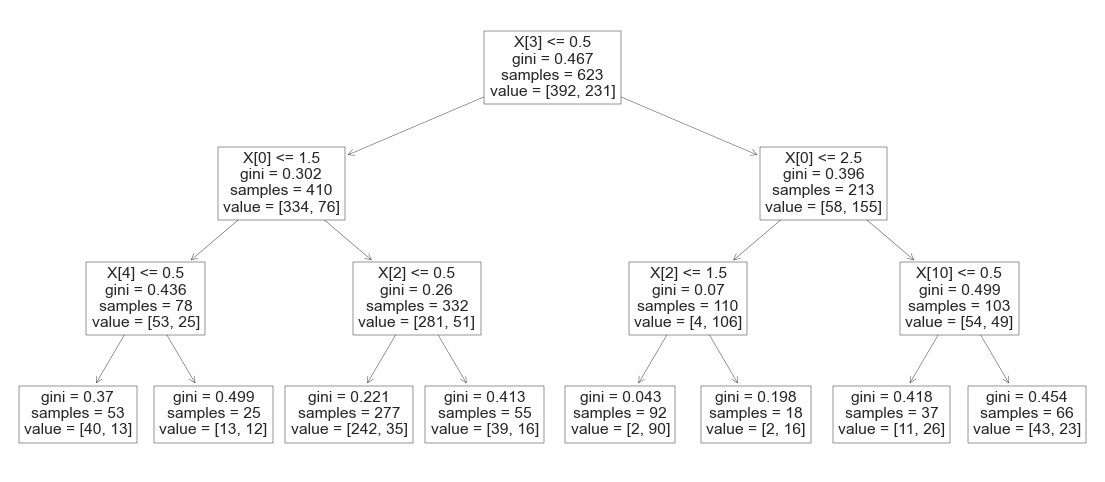

In [47]:
fig, ax = plt.subplots(figsize=(14, 6))

plot_tree(dt)

fig.savefig("images/classification_decision_tree.png")

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


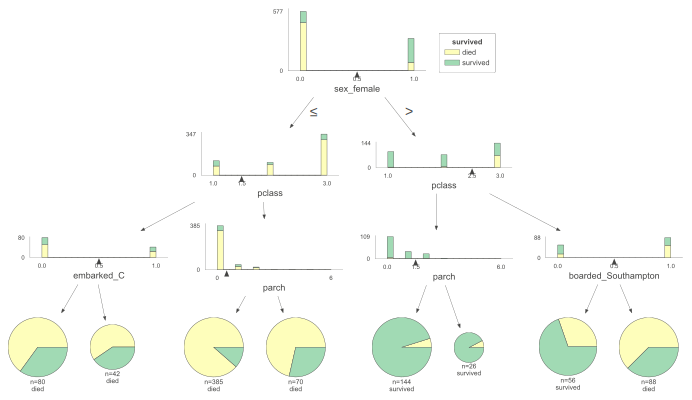

In [48]:
# using dtreeviz to view DecisionTreeClassifier
viz = dtreeviz.model(dt, X, y,
               target_name="survived",
               feature_names=X.columns,
               class_names=["died", "survived"]
)

viz.view()

In [49]:
# using text_representation to view DecisionTreeClassifier
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_10 >  0.50
|   |   |   |--- class: 0



#### Feature Importances

In [50]:
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda x: x[1],
    reverse=True
)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_female     0.677
pclass         0.237
boarded_Southampton     0.049
parch          0.022
embarked_C     0.015


#### We can use Yellowbrick to visualize the Feature Importances

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


FeatureImportances(ax=<AxesSubplot:>,
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42))

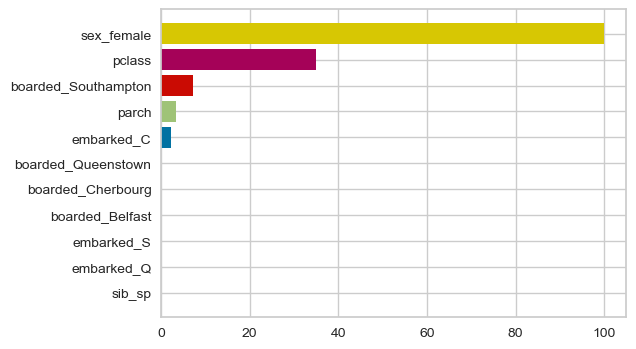

In [51]:
fig, ax = plt.subplots(figsize=(6, 4))

fi_viz = FeatureImportances(dt)

fi_viz.fit(X, y)

### Random Forest
A Random Forest is a set of decision trees. She uses *bagging* to correct the trees' tendency to overfitting. Random Forest provides us with feature importances by calculating the average importance across all trees.<br><br>
**Model Properties**<br>
*Efficiency in execution*
- Create *j* using *n_jobs*. The complexity of each tree is O(mn log n(, where *n* is the number of samples and *m* the number of attributes.

*Data pre-processing*
- it is not necessary

*To avoid overfitting*
- add more trees (*n_estimators*). Use a smaller value for *max_depth*

*Interpretation of results*
- has support for feature importances

In [52]:
rf = RandomForestClassifier(random_state=42)

In [53]:
rf.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

RandomForestClassifier(random_state=42)

In [54]:
rf.score(X_test, y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7761194029850746

In [55]:
rf.predict(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([0])

In [56]:
rf.predict_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[0.81903183, 0.18096817]])

In [57]:
rf.predict_log_proba(X.iloc[[0]])

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

array([[-0.19963233, -1.70943412]])

**Instance Parameters**

*class_weight*
- class weights in a dictionary. *balanced* defines values in inverse proportion to class frequencies

*criterion='gini'*
- separation function, *gini* or *entropy*

*max_depth=None*
- depth of the tree

*max_features=None*
- number of attributes to be analyzed for separation. The default value is all

*max_leaf_nodes=None*
- limitates the number of leaves

*min_impurity_decrease=0.0*
- separates a node if the separation decreases the impurity by an amount greater than or equal to the defined

*min_samples_leaf*
- minimum number of samples required to separate a node

*n_estimators*
- number of trees in the forest

*n_jobs*
- number of jobs to be carried out for adaptation and prediction<br><br>


**Attributes after Adjustment**

*classes_*
- class label

*feature_importances_*
- array with the importance of each feature

*n_classes_*
- number of classes

*n_features_*
- number of attributes

#### Feature Importances

In [58]:
for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x: x[1],
    reverse=True
)[:6]:
    print(f"{col:10}{val:10.3f}")

sex_female     0.459
pclass         0.203
parch          0.124
sib_sp         0.122
embarked_S     0.021
boarded_Cherbourg     0.019


The random forest classifier calculates the importance of attributes by determining the *average impurity decrease* for each attribute. Attributes that reduce classification uncertainty receive higher scores.<br><br>
These numbers may become inaccurate if the attributes vary in scale or cardinality of the category columns. A more reliable score is the *importance of the permutation*. A more reliable method is *discarded column importance*.

In [59]:
rf2 = RandomForestClassifier(random_state=42)

rf2.fit(X_train, y_train)

rfpimp.importances(
    rf2, X_test, y_test
).Importance

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

Feature
sex_female             0.134328
pclass                 0.052239
sib_sp                 0.018657
parch                  0.018657
boarded_Cherbourg      0.007463
embarked_Q             0.003731
boarded_Southampton    0.003731
boarded_Belfast        0.000000
embarked_C            -0.003731
embarked_S            -0.003731
boarded_Queenstown    -0.003731
Name: Importance, dtype: float64

### XGBoost

XGBoost is a popular library. It creates a weak tree and then "improves" subsequent trees (boosting) in order to reduce residual errors. The algorithm attempts to capture and handle any patterns in the errors until they appear to be random.<br><br>
**Model Properties**<br>
*Efficiency in execution*
- XGBoost can run in parallel. Using the *n_jobs* function to inform the number of CPUs.

*Data pre-processing*
- no need to scale in tree-based models. Category data must be encoded

*To avoid overfitting*
- the parameter *early_stopping_rounds=N* can be defined to stop training if there are no improvements after N rounds.

*Interpretation of results*
- it is possible to include the importance of attributes

In [60]:
# early_stopping_rounds shoub be passed on XGBClassifier()
xgb_class = xgb.XGBClassifier(random_state=42, early_stopping_rounds=10)

xgb_class.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-logloss:0.57031
[1]	validation_0-logloss:0.51679
[2]	validation_0-logloss:0.48825
[3]	validation_0-logloss:0.47175
[4]	validation_0-logloss:0.46462
[5]	validation_0-logloss:0.46175
[6]	validation_0-logloss:0.45947
[7]	validation_0-logloss:0.46067
[8]	validation_0-logloss:0.46213
[9]	validation_0-logloss:0.46146
[10]	validation_0-logloss:0.46267
[11]	validation_0-logloss:0.46358
[12]	validation_0-logloss:0.46430
[13]	validation_0-logloss:0.46625
[14]	validation_0-logloss:0.46672
[15]	validation_0-logloss:0.46693
[16]	validation_0-logloss:0.46796


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
xgb_class.predict(X.iloc[[0]])

array([0])

In [62]:
xgb_class.predict_proba(X.iloc[[0]])

array([[0.8203378, 0.1796622]], dtype=float32)

**Instance parameters**<br>
*max_depth*
- maximum depth

*learning_rate*
- learning rate for boosting. After each execution step, the newly added weights are scaled according to this factor. The lower the value, the more conservative it will be, but more trees will be needed to converge. In the *.train* call, we can pass a *learning_rates* parameter, which is a list of rates in each round

*n_estimators*
- number of rounds or improved trees

*n-jobs*
- number of threads to be used

*gamma*
- controls pruning. Ranges from 0 to infinity. Minimum loss reduction required to separate one more sheet. The higher the gamma value, the more conservative it will be.

*subsample*
- fraction of samples to be used in the next round
<br><br>

**Attributes** <br>
*coef_*
- coefficients for gblinear learners

*feature_importances_*
- importance of attributes. The importance of attributes is the average gain across all nodes where the attribute is used

In [63]:
for col, val in sorted(
    zip(
        X.columns,
        xgb_class.feature_importances_,
    ),
    key=lambda X: X[1],
    reverse=True
)[:6]:
    print(f"{col:10}{val:10.3f}")

sex_female     0.753
pclass         0.088
embarked_S     0.069
embarked_C     0.027
boarded_Southampton     0.023
sib_sp         0.015


#### Generating a graph of the importance of attributes with XGBoost
XGBoost has *importance_type* parameter. The default value is *weight*, which is the number of times. an attribute appears in a tree. It can be *gain*, which would be the average gain when the attribute is used, and it can also be *cover*, which would be the number of samples affected by a separation.

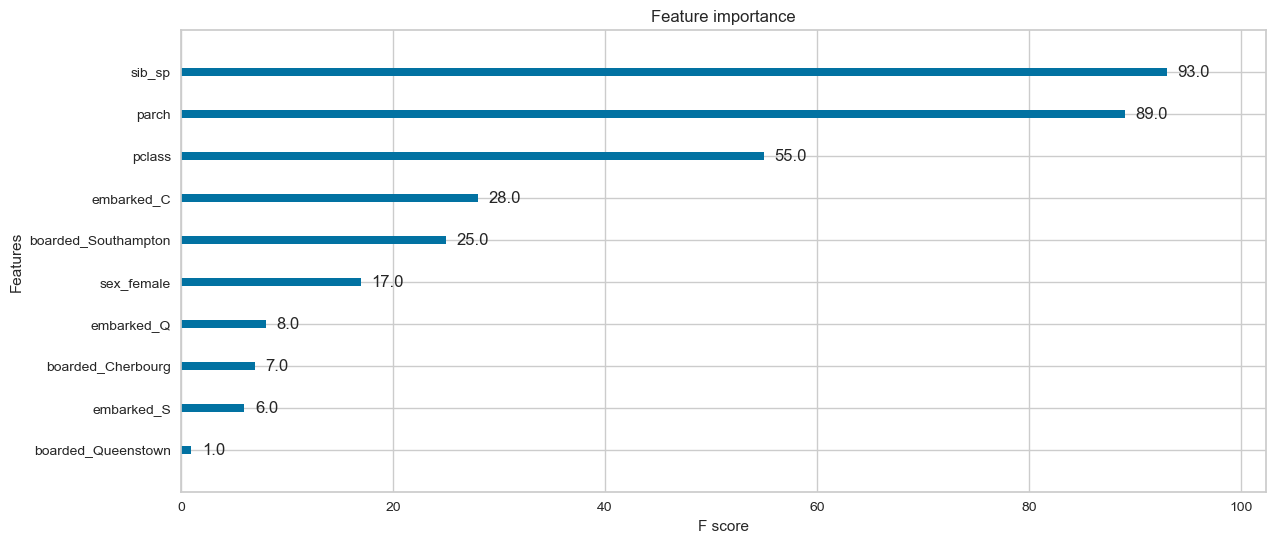

In [64]:
fig, ax = plt.subplots(figsize=(14, 6))

xgb.plot_importance(xgb_class, ax=ax)

fig.savefig("images/classification_xgboost_feature_importances.png")

#### Generating a graph of the importance of attributes with Yellowbrick

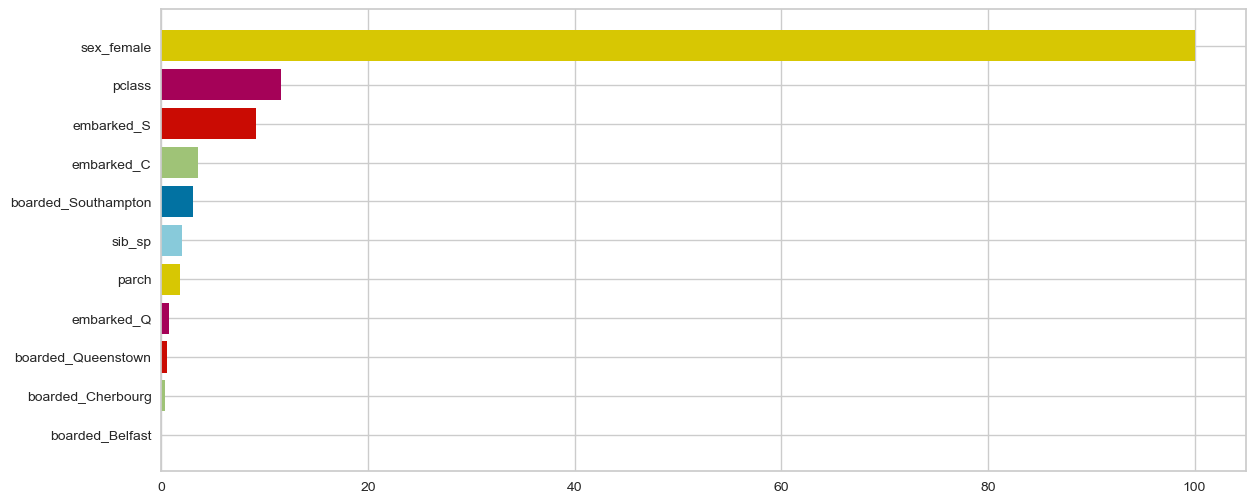

In [65]:
fig, ax = plt.subplots(figsize=(14, 6))

fi_viz = FeatureImportances(xgb_class)

fi_viz.fit(X, y)

fig.savefig("images/classification_yellowbrick_xgboost_feature_importances")

#### XGBoost offers a textual representation

In [66]:
booster = xgb_class.get_booster()

print(booster.get_dump()[0])

0:[sex_female<1] yes=1,no=2,missing=2
	1:[pclass<2] yes=3,no=4,missing=4
		3:[embarked_C<1] yes=7,no=8,missing=8
			7:leaf=-0.152207911
			8:[sib_sp<1] yes=13,no=14,missing=14
				13:leaf=0.0391094685
				14:leaf=0.210081711
		4:[parch<1] yes=9,no=10,missing=10
			9:leaf=-0.312125027
			10:[sib_sp<3] yes=15,no=16,missing=16
				15:[parch<2] yes=19,no=20,missing=20
					19:[pclass<3] yes=25,no=26,missing=26
						25:leaf=0.159070909
						26:leaf=0.0540024489
					20:leaf=-0.103271276
				16:leaf=-0.341794401
	2:[pclass<3] yes=5,no=6,missing=6
		5:leaf=0.728122056
		6:[embarked_S<1] yes=11,no=12,missing=12
			11:leaf=0.378224343
			12:[sib_sp<1] yes=17,no=18,missing=18
				17:[parch<1] yes=21,no=22,missing=22
					21:leaf=-0.00540774874
					22:leaf=0.203351706
				18:[parch<2] yes=23,no=24,missing=24
					23:[sib_sp<2] yes=27,no=28,missing=28
						27:leaf=0.0391094685
						28:leaf=-0.119986288
					24:[sib_sp<4] yes=29,no=30,missing=30
						29:leaf=-0.312173277
						30:leaf=-0.0699

The value on the sheet is the score for class 1. It can be converted to a probability using the logistic function.

Next, we will plot the graphical version of the first model tree.

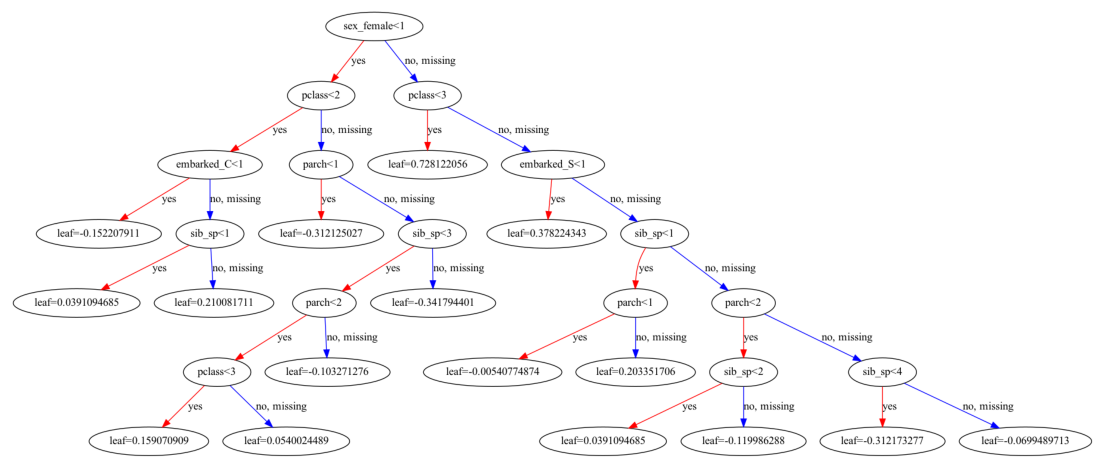

In [67]:
fig, ax = plt.subplots(figsize=(14, 6))

xgb.plot_tree(xgb_class, ax=ax, num_trees=0)

fig.savefig("images/classification_first_tree_xgboost")

#### xgbfir package
The xgb fit package is a lib developed based on XGBoost. This lib provides several measures related to the importance of attributes. Its unique feature is that it provides these measurements over columns, and over pairs of columns as well, so that you can see the interactions. Furthermore, we can obtain information about interactions between column cracks.

**Measurements**<br><br>
*Gain*
- total gain of each attribute or interaction between attributes

*FScore*
- number of possible separations in an attribute or interaction between attributes

*wFScore*
- number of possible separations in an attribute or interaction between attributes, with weights assigned according to the probability of the separations occurring

*Average wFScore*
- wFScore divided by FScore

*Average Gain*
- gin divided by FScore

*Expected Gain*
- total gain for each attribute or interaction between attributes, with weights according to the probability of obtaining the gain

In [68]:
xgbfir.saveXgbFI(
    xgb_class,
    feature_names=X.columns,
    OutputXlsxFile="temp/measurements_xgb_fir.xlsx",
)

# selecting 3 main attributes
pd.read_excel("temp/measurements_xgb_fir.xlsx").head(3).T

,0,1,2
Interaction,sex_female,pclass,sib_sp
Gain,379.654414,142.84805,42.505241
FScore,17,55,93
wFScore,16.529876,14.045843,20.533772
Average wFScore,0.972346,0.255379,0.220793
Average Gain,22.332613,2.597237,0.457046
Expected Gain,379.548162,50.995431,8.378532
Gain Rank,1,2,3
FScore Rank,6,3,1
wFScore Rank,3,4,1


From this table, we can see that *sex_female* has a high position in terms of **Gain**, **Average wDScore**, **Average gain** and **Expected gain**, while *sib_sp* is highlights in **FScore** and **wFScore**<br><br>
Let's analyze the pairs to see the interactions between the columns

In [69]:
pd.read_excel(
       "temp/measurements_xgb_fir.xlsx",
        sheet_name='Interaction Depth 1',
).head(5).T

,0,1,2,3,4
Interaction,pclass|sex_female,embarked_C|sex_female,parch|sib_sp,boarded_Southampton|pclass,parch|pclass
Gain,682.738344,213.974151,85.610465,73.459797,69.431143
FScore,19,7,76,10,34
wFScore,6.696276,4.469629,11.093538,2.025271,6.144314
Average wFScore,0.352436,0.638518,0.145968,0.202527,0.180715
Average Gain,35.933597,30.567736,1.126453,7.34598,2.042092
Expected Gain,297.053634,135.278625,9.722621,13.899008,16.883675
Gain Rank,1,2,3,4,5
FScore Rank,5,12,1,9,2
wFScore Rank,2,5,1,13,3


In this case, we can see that the two main interactions involve the *sex_female* and *pclass* column. If we had to choose just 2 attributes for our model, we would probably choose *sex_female* and *pclass*<br><br>
Next, we will analyze the column triplets

In [70]:
pd.read_excel(
       "temp/measurements_xgb_fir.xlsx",
        sheet_name='Interaction Depth 2',
).head(5).T

,0,1,2,3,4
Interaction,parch|pclass|sex_female,embarked_C|pclass|sex_female,embarked_C|parch|sex_female,boarded_Southampton|pclass|sex_female,embarked_S|pclass|sex_female
Gain,290.659149,280.774067,274.886305,262.253072,245.16775
FScore,13,5,10,6,2
wFScore,2.858115,0.982809,3.039919,1.241735,0.392584
Average wFScore,0.219855,0.196562,0.303992,0.206956,0.196292
Average Gain,22.358396,56.154813,27.48863,43.708845,122.583875
Expected Gain,116.45915,33.283718,93.816232,49.074718,41.196628
Gain Rank,1,2,3,4,5
FScore Rank,7,17,11,15,28
wFScore Rank,4,20,3,17,32


### LightGBM
LightGBM is a Microsoft implementation. It uses a sampling method to deal with continuous values. This allows for faster tree creation (compared to XGBoost), as well as reducing memory usage.<br>
LightGBM also creates trees in depth by leaves, rather than levels. Because of this, instead of using *max_depth* to control overfitting, we use *num_leaves*.<br><br>
**Model properties**<br><br>
*Efficiency in execution*
- can take advantage of multiple CPUs

*Data pre-processing*
- has some support for encoding category columns as integers

*To avoid overfitting*
- reduce *num_leaves*, increase *min_data_in_leaf* and use *min_gain_to_split* with **lambda_L1** and **lambda_L2**

*Interpretation of results*
- the importance of attributes is available

In [71]:
lgbm_class = lgb.LGBMClassifier(
    random_state=42
)

In [72]:
lgbm_class.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [73]:
lgbm_class.score(X_test, y_test)

0.7910447761194029

In [74]:
lgbm_class.predict(X.iloc[[0]])

array([0])

In [75]:
lgbm_class.predict_proba(X.iloc[[0]])

array([[0.83150466, 0.16849534]])

**Instance parameters**<br><br>
*boosting_type='gbdt'*
- can be *gbdt* as gradient boosting, *rf* as random forest, *dart* as dropouts meet multiple additive regression trees, or *gross* as gradient-based, one-sided sampling

*class_weight=None*
- use of a dictionary to define weights for each class label when solving multi-class problems

*colsample_bytree=1.0*
- range of (0, 10]. Selects a percentage of attributes for each boosting round

*importance_type='split'*
- how to calculate the importance of attributes. *split* means the number of times an attribute is used, and *gain* is the total gains from splits for an attribute

*learning_rate=0.1*
- range of (0, 10]. Learning rate for boosting. A smaller value delays overfitting, as boosting rounds will have less impact. A smaller number should result in better performance, but will require a larger value for *num_iterations*

*max_depth*
- maximum depth of the tree

*min_child_sample=20*
- number of samples required for a sheet. Smaller numbers imply more overfitting

*n_estimators*
- number of trees or boosting rounds

*n_jobs*
- number of threads

*num_leaves*
- maximum number of leaves on the tree

#### Importance of attributes based on *split*

In [78]:
for col, val in sorted(
    zip(cols, lgbm_class.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:7]:
    print(f"{col:10}{val:10.3f}")

pclass       388.000
parch        321.000
sib_sp       296.000
sex_female   151.000
boarded_Southampton   142.000
embarked_C    61.000
boarded_Cherbourg    52.000


#### Feature Importances
The LightGBM lib is capable of generating a graph of the importance of attributes. The default is based on *splits*, that is, the number of times an attribute is used.

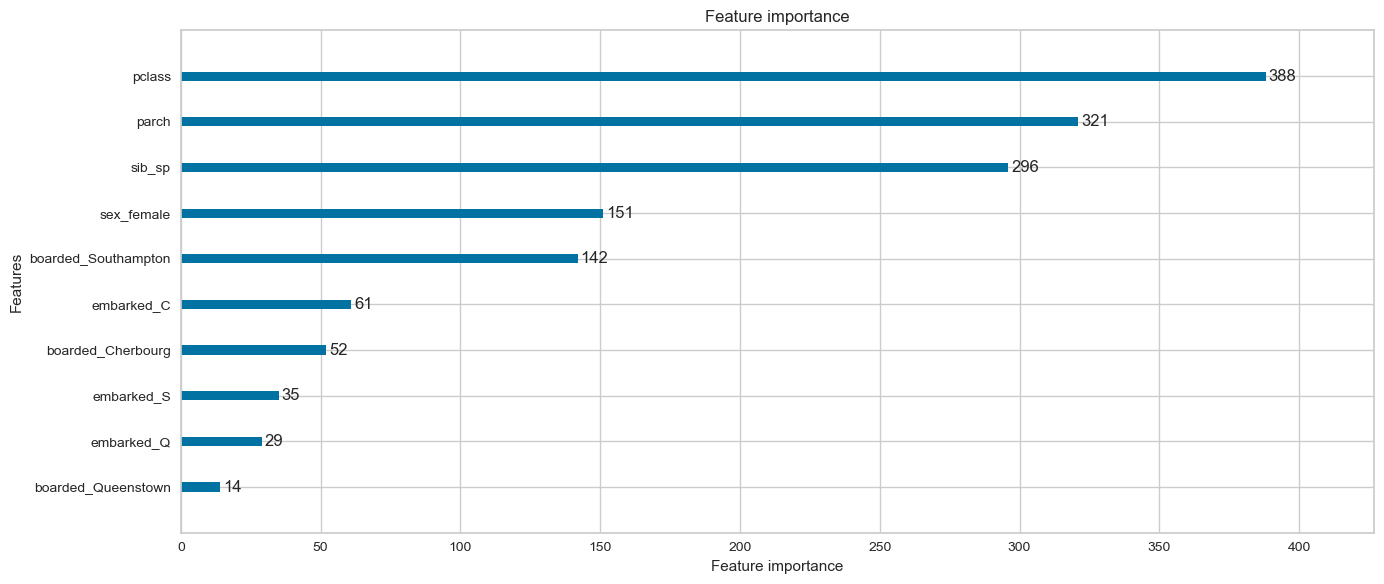

In [80]:
fig, ax = plt.subplots(figsize=(14, 6))

lgb.plot_importance(lgbm_class, ax=ax)

fig.tight_layout()

fig.savefig("images/classification_lightgbm_feature_importances")

#### Feature Importances
We can also create a decision tree

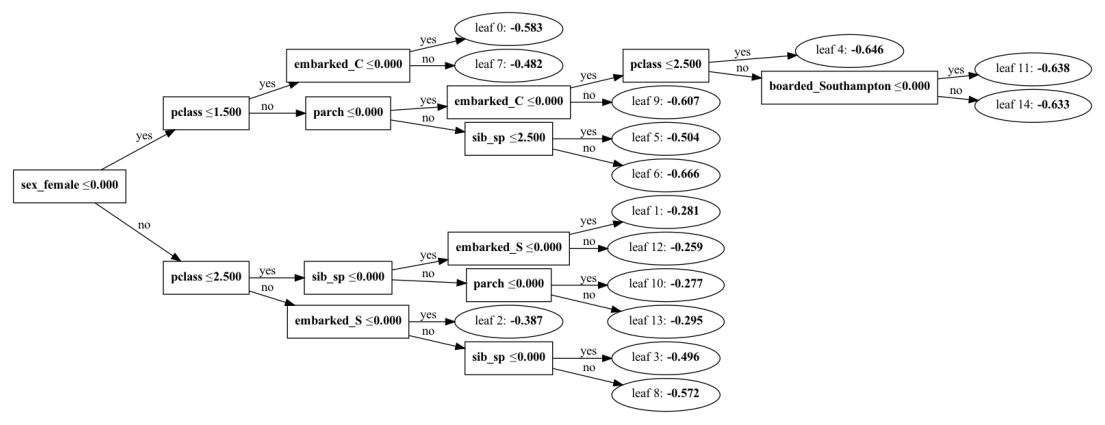

In [81]:
fig, ax = plt.subplots(figsize=(14, 6))

lgb.plot_tree(lgbm_class, tree_index=0, ax=ax)

fig.savefig("images/classification_lightgbm_feature_importances_decision_tree")

Visualizing the decision_tree created

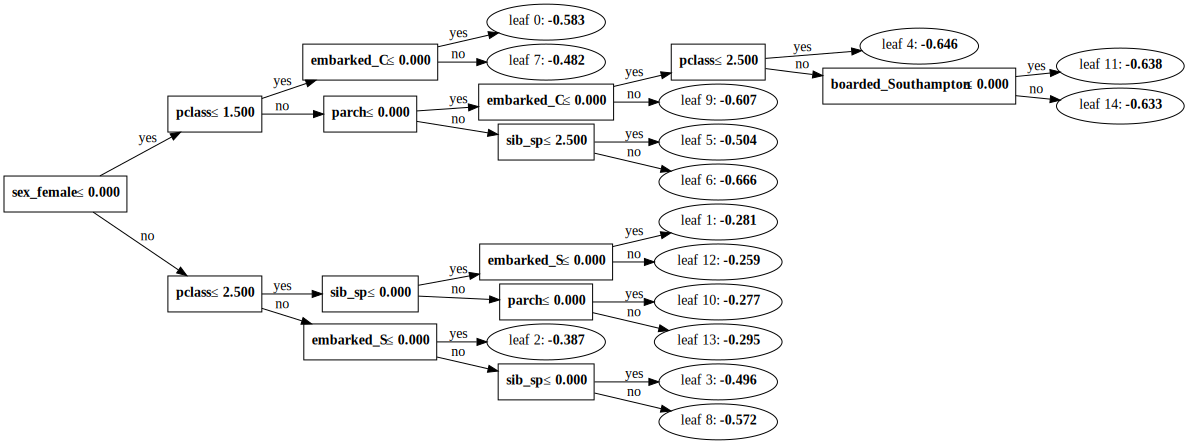

In [84]:
lgb.create_tree_digraph(lgbm_class)

In [ ]:
# 